# Stage 1: Data Description & Exploratory Data Analysis

### Group: 22

## Table of contents:
* [Section 0: TA Feedback](#Section-0:-TA-Feedback)
* [Section 1: Data Description](#Section-1:-Data-Description)
* [Section 2: Research question](#Section-2:-Research-Question)
* [Section 3: Exploratory Data Analysis and Visualization](#Section-3:-Exploratory-Data-Analysis-and-Visualization)
* [Section 4: Method and Plan](#Section-4:-Method-and-Plan)
* [Section 5: Computational Code and Output](#Section-5:-Computational-Code-and-Output)
* [References](#References)

#### Section 0: TA Feedback

Score: 28/30

Feedback given: "x axis variable levels can be more descriptive (no underscores). good observation - you can also use one box plot omitting visitor type to better confirm your observations."

Since the feedback is only regarding the visualizations, all revisions are in [Section 3: Exploratory Data Analysis and Visualization](#Section-3:-Exploratory-Data-Analysis-and-Visualization).

#### Section 1: Data Description

##### Dataset summary
- For this project, our group will be working with the [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset).
- This dataset contains information about the browser sessions of users visiting an online shopping website.
- The dataset contains 18 variables (described below) for 12,330 observations, with no missing values; however, we will only use observations where the Region is not 1, as specified in our group's instructions.
<table><thead>
  <tr>
    <th>Variable Name</th>
    <th>Type</th>
    <th>Description</th>
    <th>Data collection method</th>
  </tr></thead>
<tbody>
  <tr>
    <td>Administrative</td>
    <td>Integer</td>
    <td>Number of administrative pages visited</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>Administrative_Duration</td>
    <td>Continuous</td>
    <td>Total time spent on administrative pages (s)</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>Informational</td>
    <td>Integer</td>
    <td>Number of informational pages visited</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>Informational_Duration</td>
    <td>Continuous</td>
    <td>Total time spent on informational pages (s)</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>ProductRelated</td>
    <td>Integer</td>
    <td>Number of product-related pages visited</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>ProductRelated_Duration</td>
    <td>Continuous</td>
    <td>Total time spent on product-related pages (s)</td>
    <td>Derived from URL information</td>
  </tr>
  <tr>
    <td>BounceRates</td>
    <td>Continuous</td>
    <td>Average bounce rate (leaving a page without analytics server requests) of pages visited</td>
    <td>Google Analytics</td>
  </tr>
  <tr>
    <td>ExitRates</td>
    <td>Continuous</td>
    <td>Average exit rate of pages visited</td>
    <td>Google Analytics</td>
  </tr>
  <tr>
    <td>PageValues</td>
    <td>Continuous</td>
    <td>Average value for a web page visited</td>
    <td>Google Analytics</td>
  </tr>
  <tr>
    <td>SpecialDay</td>
    <td>Continuous</td>
    <td>Value between 0 and 1 indicating closeness of site visit to special day</td>
    <td>Calculated based on dynamics of e-commerce</td>
  </tr>
  <tr>
    <td>Month</td>
    <td>Categorical</td>
    <td>Month of site visit</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>OperatingSystems</td>
    <td>Categorical (encoded as Integer)</td>
    <td>Operating system used during site visit</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>Browser</td>
    <td>Categorical (encoded as Integer)</td>
    <td>Browser used during site visit</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>Region</td>
    <td>Categorical (encoded as Integer)</td>
    <td>Geographic region of session</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>TrafficType</td>
    <td>Categorical (encoded as Integer)</td>
    <td>Type of traffic that brought visitor to site</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>VisitorType</td>
    <td>Categorical</td>
    <td>"Returning Visitor," "New Visitor," or "Other"</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>Weekend</td>
    <td>Binary</td>
    <td>Whether the site visit was on a weekend</td>
    <td>NA</td>
  </tr>
  <tr>
    <td>Revenue</td>
    <td>Binary</td>
    <td>Whether the session ended in a transaction</td>
    <td>NA</td>
  </tr>
</tbody></table>

##### Source and information
- The data was collected from sessions on an unspecified online retail website.
- Each session belongs to a different user and takes place within a one-year period.
- Other than this, there is limited information available about how the online shopping data was collected.

##### Pre-selection of variables
- `Region`, `TrafficType`, `OperatingSystems`, and `Browser` may not be useful for analysis, since there is no information on how the categories were encoded. This makes it impossible to interpret these variables, so we will remove them (done in the exploratory data analysis).

#### Section 2: Research Question

- We want to determine the association between a site visitor's purchasing decision (response), and predictors related to the site visitor's browsing behaviour (e.g. time spent on various types of pages, web page bounce rate) and time of site visit (e.g. whether the user visited on a special day or weekend).
- The response variable will be `Revenue` (`TRUE` if the session resulted in a purchase, `FALSE` otherwise).
- The focus of our research question is inference, since we are trying to understand which predictors are relevant to purchasing decisions, rather than trying to predict a new visitor's purchasing decision. This information would be useful for an online retail company, as it can gain insight into which specific aspects of its website to modify to maximize revenue.

#### Section 3: Exploratory Data Analysis and Visualization

In [2]:
# Load required libraries
library(tidyverse)
library(dplyr)
library(broom)
library(car)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [3]:
# Download and load dataset from the Web
zipped <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip", zipped)
unzipped <- unz(zipped, "online_shoppers_intention.csv")
shopping <- read.csv(unzipped) |> 
    filter(Region != 1) # As required for our group's data
shopping_selected <- shopping |> select(-Region, -TrafficType, -OperatingSystems, -Browser) # As discussed in variable pre-selection
head(shopping_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000,0.20000000,0,0.0,Feb,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,2.666667,0.05000,0.14000000,0,0.0,Feb,Returning_Visitor,FALSE,FALSE
3,0,0,0,0,1,0.000000,0.20000,0.20000000,0,0.4,Feb,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,37.000000,0.00000,0.10000000,0,0.8,Feb,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,3,395.000000,0.00000,0.06666667,0,0.0,Feb,Returning_Visitor,FALSE,FALSE
6,0,0,0,0,16,407.750000,0.01875,0.02583333,0,0.4,Feb,Returning_Visitor,FALSE,FALSE


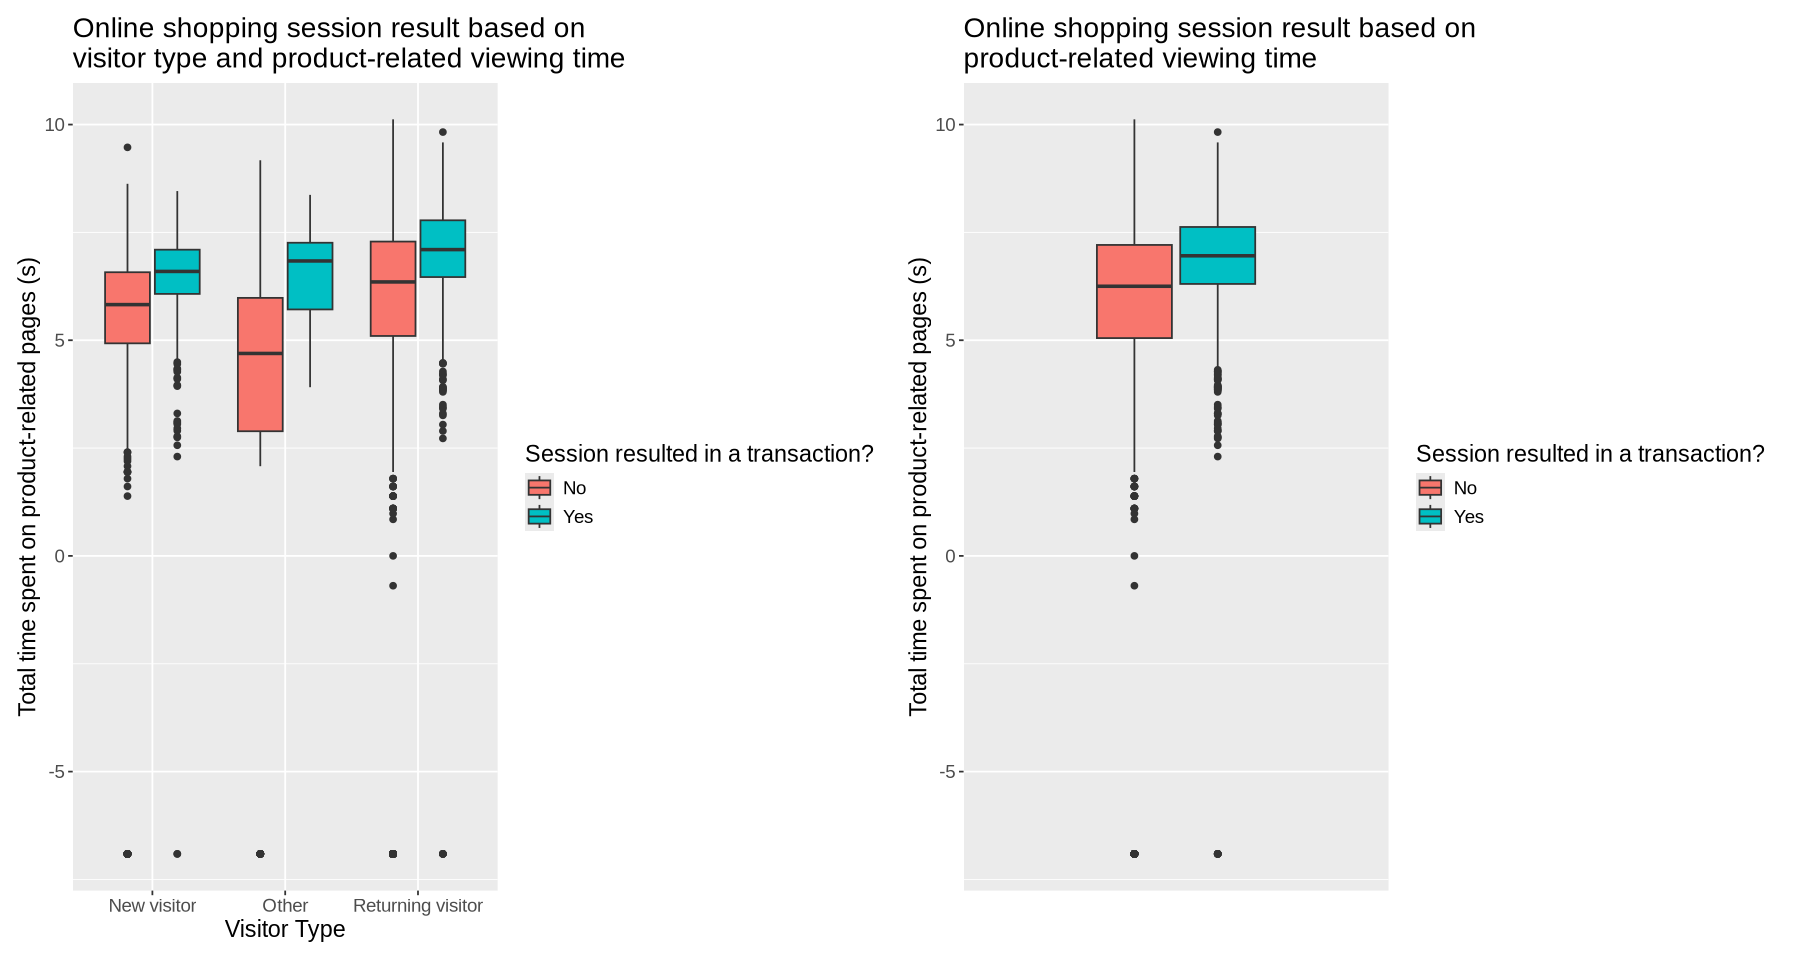

In [4]:
options(repr.plot.height = 8, repr.plot.width = 15)
# Code from stage 1
# vis <- ggplot(shopping_selected) +
#     # Use log scale for y due to large variance; add small constant to smooth zero values
#     geom_boxplot(aes(y = log(ProductRelated_Duration + 0.001), x = VisitorType, fill = Revenue)) +
#     labs(y = "Total time spent on product-related pages (s)", fill = "Session resulted in a transaction?", x = "Visitor Type") +
#     scale_fill_discrete(labels = c("No", "Yes")) +
#     theme(text = element_text(size = 18)) +
#     ggtitle("Online shopping session result based on visitor type and product-related viewing time")

vis_by_visitor_type <- ggplot(shopping_selected) +
    # Use log scale for y due to large variance; add small constant to smooth zero values
    geom_boxplot(aes(y = log(ProductRelated_Duration + 0.001), x = VisitorType, fill = Revenue)) +
    labs(y = "Total time spent on product-related pages (s)",
         fill = "Session resulted in a transaction?", x = "Visitor Type") +
    scale_fill_discrete(labels = c("No", "Yes")) +
    scale_x_discrete(labels = c("New visitor", "Other", "Returning visitor")) +
    theme(text = element_text(size = 14)) +
    ggtitle("Online shopping session result based on\nvisitor type and product-related viewing time")

# NEW PLOT ADDED FOR STAGE 2
vis_aggregated <- ggplot(shopping_selected) +
    # Use log scale for y due to large variance; add small constant to smooth zero values
    geom_boxplot(aes(y = log(ProductRelated_Duration + 0.001), fill = Revenue)) +
    labs(y = "Total time spent on product-related pages (s)",
         fill = "Session resulted in a transaction?") +
    scale_fill_discrete(labels = c("No", "Yes")) +
    scale_x_discrete(labels = c()) +
    theme(text = element_text(size = 14)) +
    ggtitle("Online shopping session result based on\nproduct-related viewing time")
vis_by_visitor_type + vis_aggregated

##### Plot relevance
- This plot is relevant to our research question because it helps visualize the relationship between `Revenue`, our response, and both `ProductRelated_Duration` and `VisitorType`, which are two of our predictors.
- We can use this to determine if these predictors are relevant, and if so, whether there is a positive or negative correlation.

##### Interpretation
- From the plot above, we can see that the total time spent on product-related pages tends to be higher for sessions that resulted in a transaction, regardless of visitor type.
- Returning visitors tend to spend more time on product-related pages than the other two types of visitors.
- The difference in median total time spent on product-related pages between sessions that did and did not end in a transaction is greatest for the "Other" group of visitors.

##### Insights
- Based on the interpretation, we conclude that both `ProductRelated_Duration` and `VisitorType` appear to have some association with `Revenue`, making them likely to be relevant in our future model.
- There may be some interaction between `ProductRelated_Duration` and `VisitorType`, since the "Other" visitor group seems to show a stronger association between the total time spent on product-related pages and whether the session ended in a transaction. 

# Stage 2: Method, Plan, Computation Code and Output

#### Section 4: Method and Plan

- I plan to use an additive logistic regression model using `Revenue` as the response variable.

##### Reasoning
- This method is appropriate because `Revenue` is a binary response variable, so using a logistic regression model will ensure that the fitted values are bounded between 0 and 1 as they should be.
- Also, using logistic regression will make the interpretation much more intuitive (e.g. we can say some variable is associated with some increase in the *odds* of a session resulting in a purchase), which is important for inference.

##### Assumptions
- We must assume that the observations are independent (likely true, given that the sessions were all collected from *different* users).
- By using logistic regression, we must also assume that the values of the response `Revenue` follow a Bernoulli distribution and that the log-odds have a linear relationship with the covariates.

##### Weaknesses
- One weakness of using logistic regression is that the assumptions can be restrictive, especially the assumptions of the response's Bernoulli distribution and the linearity of the log-odds with the covariates.
- If the Bernoulli assumption is not met, we may get overdispersion, which would lead to the standard errors being biased and thus our true confidence level would not match the "claimed" confidence level.

#### Section 5: Computational Code and Output

In [7]:
shopping_model <- glm(Revenue ~ ., family = binomial, data = shopping)
shopping_model |> tidy(exponentiate = TRUE) |> mutate_if(is.numeric, round, 6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.204448,0.262950,-6.037042,0.000000
Administrative,1.019380,0.014216,1.350277,0.176927
Administrative_Duration,0.999928,0.000260,-0.276639,0.782057
Informational,1.000589,0.036644,0.016080,0.987170
Informational_Duration,1.000281,0.000288,0.974179,0.329968
ProductRelated,0.998749,0.001645,-0.760570,0.446914
ProductRelated_Duration,1.000120,0.000039,3.030388,0.002442
BounceRates,0.011118,4.064979,-1.106811,0.268376
ExitRates,0.000001,3.040171,-4.662282,0.000003


In [8]:
vif(shopping_model)

,GVIF,Df,GVIF^(1/(2*Df))
Administrative,1.872669,1,1.368455
Administrative_Duration,1.587332,1,1.259894
Informational,1.845493,1,1.358489
Informational_Duration,1.634876,1,1.278623
ProductRelated,4.695807,1,2.166981
ProductRelated_Duration,4.482609,1,2.117217
BounceRates,2.055216,1,1.433602
ExitRates,2.283363,1,1.511080
PageValues,1.065627,1,1.032292
SpecialDay,1.235098,1,1.111350


#### Interpretation of results
- At a 5% significance level, we see that the coefficients for the continuous variables `ProductRelated_Duration`, `ExitRates` and `PageValues` are statistically significant, so we can say that if we keep all other variables in the model constant, an increase in `ProductRelated_Duration` or `PageValues` is associated with a multiplicative increase in the odds of a session resulting in a purchase (since their estimated coefficients are greater than 1), while an increase in `ExitRates` is associated with a multiplicative decrease in the odds of a session resulting in a purchase (since its estimated coefficient is less than 1).
- The coefficients for the dummy variables `MonthNov` and `WeekendTRUE` are statistically significant, and the estimated coefficients are greater than 1, so we can say that if we keep all other variables in the model constant, sessions made in November are more likely to result in a purchase than those in August, and those made during the weekend are more likely to result in a purchase than those made on a weekday.
- The coefficients for the dummy variables `MonthDec`, `MonthFeb`, `MonthMar`, `MonthMay`, and `VisitorTypeReturning_Visitor` are also all statistically significant, and the estimated coefficients are all less than 1, so we can say that if we keep all other variables in the model constant, sessions made in December, February, March, or May are less likely to result in a purchase than those in August, and sessions by returning visitors are less likely to result in a purchase than those made by new visitors.
- A potential problem with these results is that the GVIF for `ProductRelated` and `ProductRelated_Duration` were found to be 4.696 and 4.483, respectively, and while these do not exceed the typical thresholds of 5 or 10, they could indicate multicollinearity and thus make our significance level not match the true probability of a type I error, so it may be worth re-fitting a model with one of these covariates removed to compare the results.

## References
Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0

Link to download dataset: https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip